In [1]:
import xmitgcm as xmit

In [2]:
import matplotlib.pyplot as plt

In [3]:
import xarray as xr

In [4]:
ds = xmit.open_mdsdataset("../../data/SimRockallTrough/").rename({"PTRACER01": "c"})
ds["c"]=ds["c"].where(ds['hFacC']!=0.)

ds.attrs["M_real"] = 16. #kg
ds.attrs["M_sim"] = (ds["c"]*(ds['rA']*ds['drF']*ds['hFacC'])).isel(time=0).sum(["XC", "YC", "Z"]).values

ds["c"] *= ds.attrs["M_real"]/ds.attrs["M_sim"]

/Users/hdrake/opt/anaconda3/envs/bblturb-analysis/lib/python3.9/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in ../../data/SimRockallTrough/ or ../../data/SimRockallTrough/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [5]:
ds["c_Zint"] = (ds["c"]*ds["drF"]*ds["hFacC"]).sum("Z").compute()

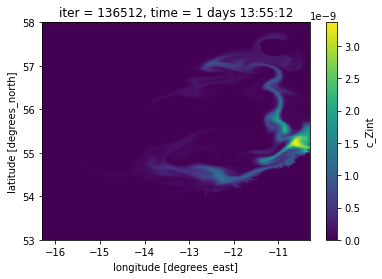

In [6]:
ds["c_Zint"].isel(time=-1).plot()

In [7]:
ds.to_zarr("data/interim/c_Zint")